In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import pickle

In [2]:
df = pd.read_csv('data/Algerian_forest_fire.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
# drop Day, month and year
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [8]:
# Encoding
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)

In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [11]:
# Independent And dependent features
X = df.drop('FWI', axis = 1)
y = df['FWI']

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [14]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [15]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [16]:
# Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<AxesSubplot:>

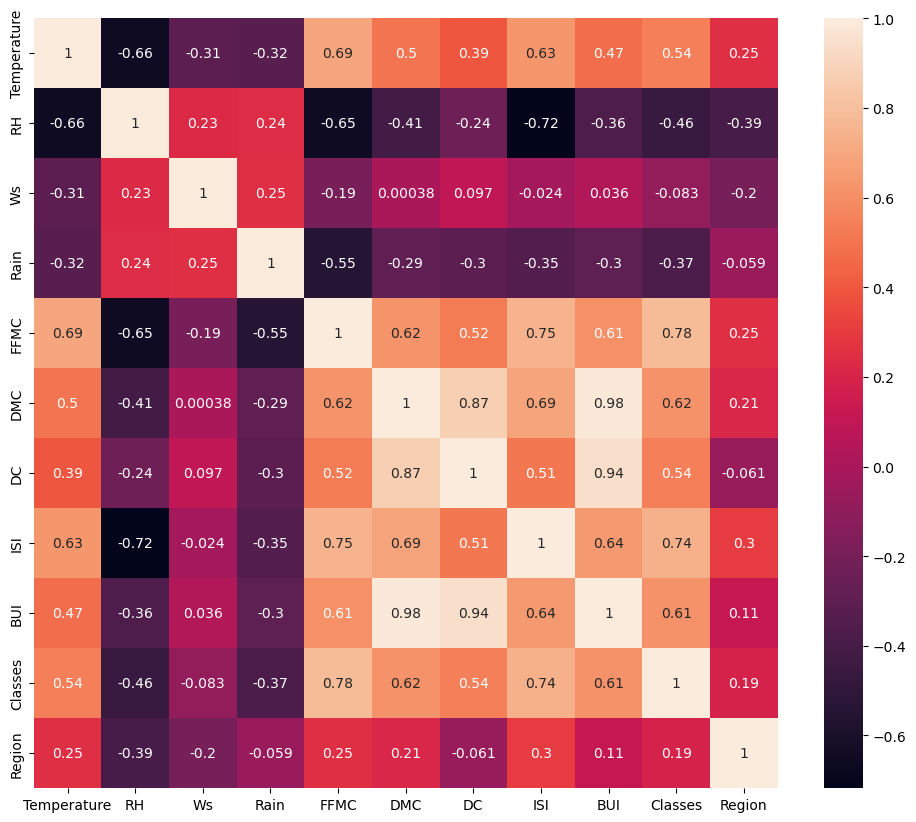

In [17]:
# Check for Multi-collinearity
plt.figure(figsize = (12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot = True)

In [18]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [19]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
# Threshold-Domain expertise
corr_features = correlation(X_train,0.85)

In [21]:
corr_features

{'BUI', 'DC'}

In [22]:
# Drop features when correlation is more than 0.85
X_train.drop(corr_features, axis = 1, inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

## Standardization

In [23]:
scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

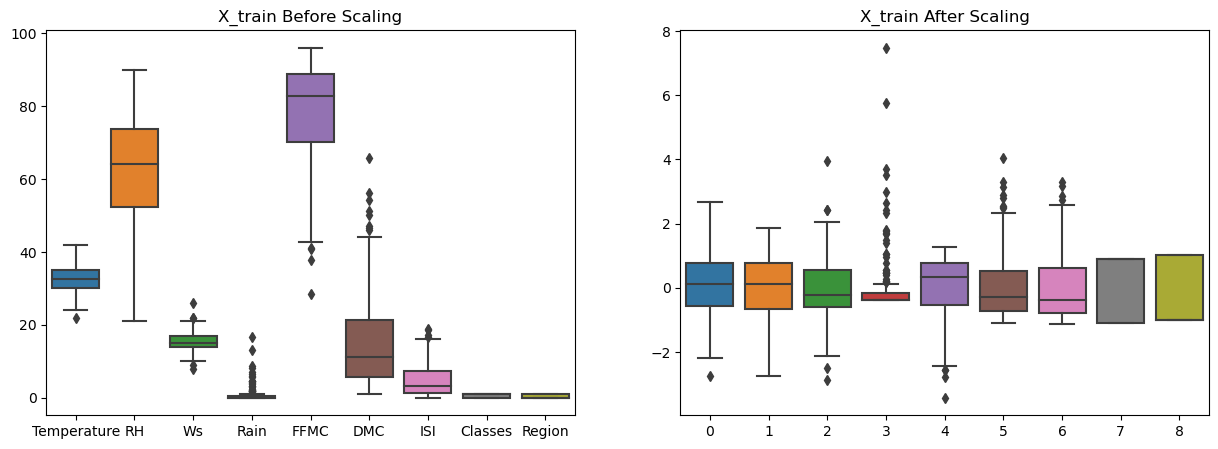

In [26]:
plt.subplots(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data = X_train)
plt.title('X_train Before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
linreg = LinearRegression()

linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
y_pred = linreg.predict(X_test_scaled)

Mean absolute error 0.5468236465249978
R2 Score 0.9847657384266951


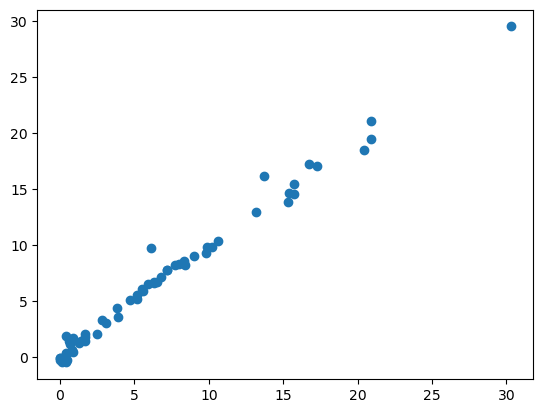

In [30]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test, y_pred)

## Lasso Regression

In [31]:
from sklearn.linear_model import Lasso

In [32]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso()

In [33]:
y_pred = lasso.predict(X_test_scaled)

Mean absolute error 1.133175994914409
R2 Score 0.9492020263112388


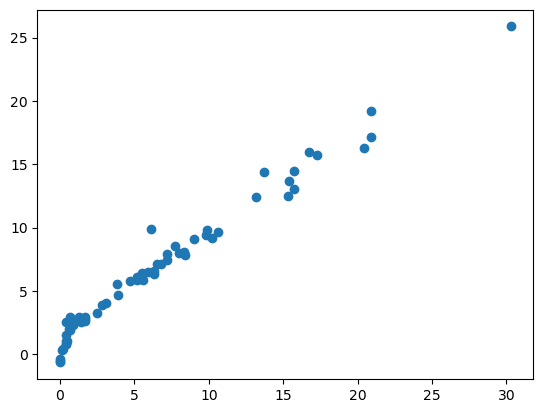

In [34]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test, y_pred)

### Cross Validation Lasso

In [35]:
from sklearn.linear_model import LassoCV

In [36]:
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [37]:
y_pred = lassocv.predict(X_test_scaled)

Mean absolute error 0.6199701158263431
R2 Score 0.9820946715928275


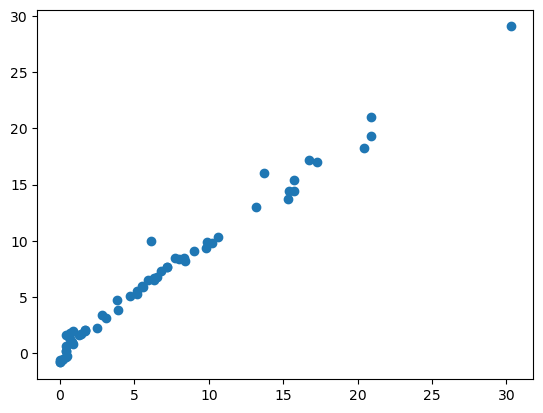

In [38]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test, y_pred)

## Ridge Regression model

In [39]:
from sklearn.linear_model import Ridge

In [40]:
ridge = Ridge(solver = 'svd')
# ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

Ridge(solver='svd')

In [41]:
y_pred = ridge.predict(X_test_scaled)

Mean absolute error 0.5642305340105724
R2 Score 0.9842993364555513


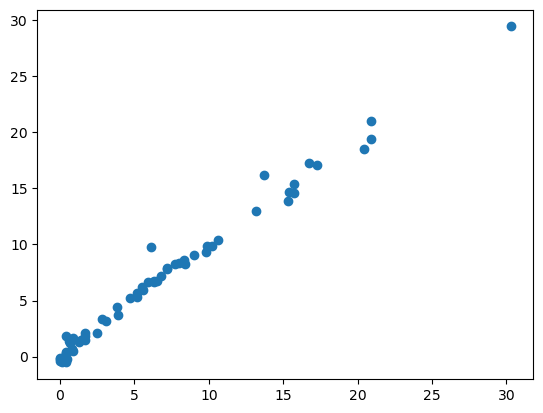

In [42]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test, y_pred)

### Cross Validation Ridge

In [43]:
from sklearn.linear_model import RidgeCV

In [44]:
ridgecv = RidgeCV(alphas = (0.1, 1.0, 10.0), solver='svd', cv=5)
# ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)

RidgeCV(cv=5)


In [ ]:
y_pred = ridgecv.predict(X_test_scaled)

Mean absolute error 0.5642305340105692
R2 Score 0.9842993364555513


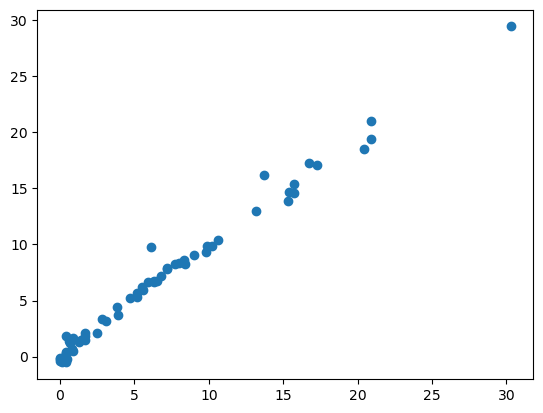

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test, y_pred)

## ElasticNet Regression

In [45]:
from sklearn.linear_model import ElasticNet

In [46]:
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)

ElasticNet()

In [47]:
y_pred = elastic.predict(X_test_scaled)

Mean absolute error 1.8822353634896005
R2 Score 0.8753460589519703


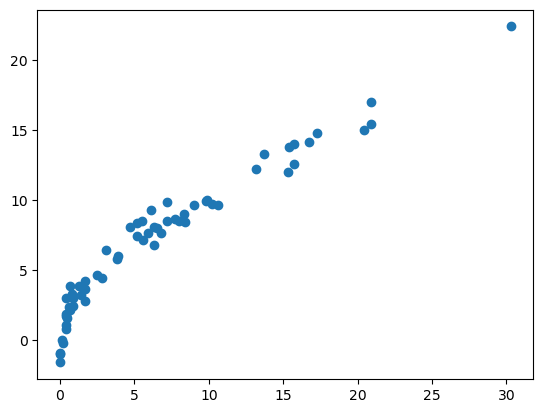

In [48]:
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test, y_pred)

### Cross Validation ElasticNet

In [49]:
from sklearn.linear_model import ElasticNetCV

In [50]:
elasticcv = ElasticNetCV(cv = 5)
elasticcv.fit(X_train_scaled, y_train)

ElasticNetCV(cv=5)

In [51]:
y_pred = elasticcv.predict(X_test_scaled)

Mean absolute error 0.6575946731430898
R2 Score 0.9814217587854941


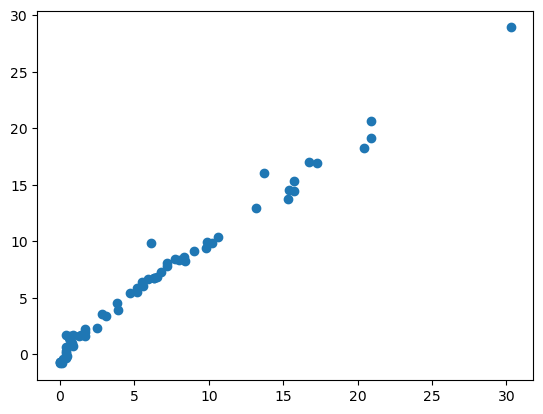

In [52]:
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test,y_pred)

In [53]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

# Pickle the Models along with Standard Scaler

In [54]:
# Pickle the Standard Scaler 
pickle.dump(scaler, open('scaler.pkl','wb'))

In [55]:
# Pickle the Lasso Regression Model
pickle.dump(lasso, open('lasso.pkl','wb'))

In [56]:
# Pickle the Ridge Regression Model
pickle.dump(ridge, open('ridge.pkl','wb'))

In [57]:
# Pickle the ElasticNet Regression Model
pickle.dump(elastic, open('elastic.pkl','wb'))